Current working directory: /content/CompVisionAssignment
Files in current directory: ['image', '.git', '249316K.ipynb']


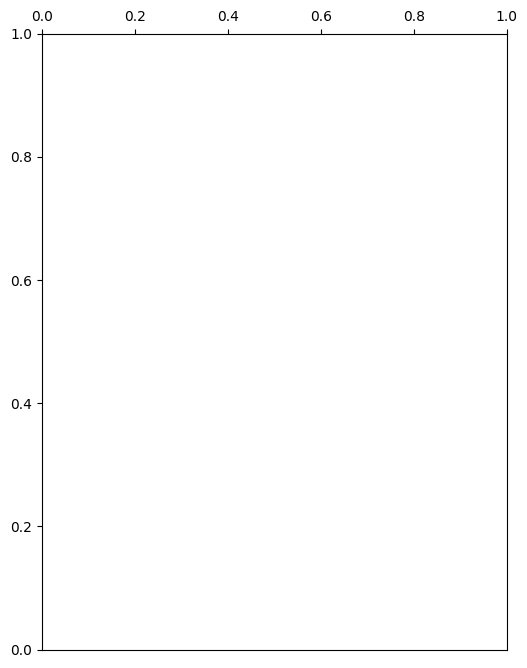

In [37]:
import os
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir('.'))

from PIL import Image
import matplotlib.pyplot as

img = Image.open(image_path)
im = cv.imread('image/emma.jpg', cv.IMREAD_GRAYSCALE)
if im is None:
  print(f"Error: Could not load image at {im}")
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.xaxis.set_ticks_position('top')
plt.show()

101
50
105
256


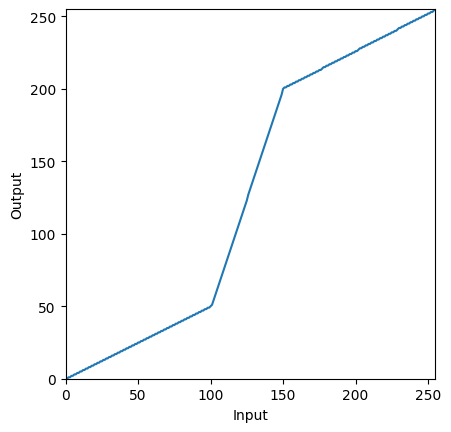

In [ ]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input')
ax.set_ylabel('Output')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()


# img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
# cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
# cv.imshow("Image", img_orig)
# cv.waitKey(0)
# image_transformed = cv.LUT(img_orig, transform)
# cv.imshow("Image", image_transformed)
# cv.waitKey(0)
# cv.destroyAllWindows()

51
100
106
255


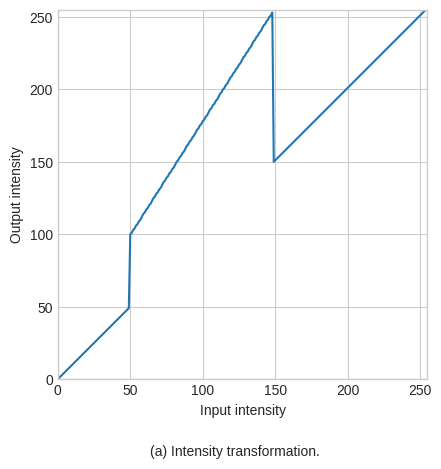

error: OpenCV(4.12.0) /io/opencv/modules/core/src/lut.cpp:159: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == CV_8U || depth == CV_8S) in function 'LUT'


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

points = np.array([(0, 0), (50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(points[0,1], points[1,1], points[1,0] - points[0,0] + 1)
print(len(t1))

t2 = np.linspace(points[2,1], points[3,1], points[3,0] - points[2,0])
print(len(t2))

t3 = np.linspace(points[4,1], points[5,1], points[5,0] - points[4,0] + 1)
print(len(t3))

transform = np.concatenate((t1[:-1], t2[:-1], t3)).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
ax.grid(True)
plt.figtext(0.5, -0.05, '(a) Intensity transformation.', ha='center')
plt.show()

img_orig = cv.imread('image/emma.jpg', cv.IMREAD_GRAYSCALE)

image_transformed = cv.LUT(img_orig, transform)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_transformed, cmap='gray')
ax[0].set_title('Transformed Image')

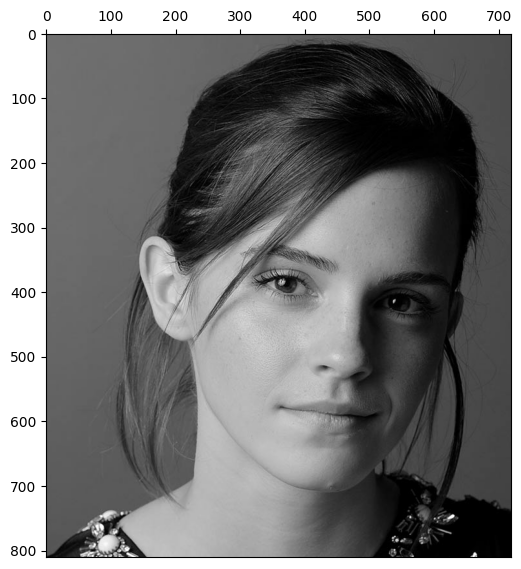

In [39]:
import cv2 as cv
import matplotlib.pyplot as plt
im = cv.imread('image/emma.jpg', cv.IMREAD_GRAYSCALE)
if im is None:
  print(f"Error: Could not load image at {im}")
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

In [23]:
# Check where you are
!pwd

# See what files are available
!ls -la

# Navigate to the right directory if needed
%cd /path/to/your/repo

# Check if a specific file exists
import os
print(os.path.exists('images/your_image.jpg'))

/content
total 16
drwxr-xr-x 1 root root 4096 Sep  2 13:40 .
drwxr-xr-x 1 root root 4096 Sep  4 13:11 ..
drwxr-xr-x 4 root root 4096 Sep  2 13:40 .config
drwxr-xr-x 1 root root 4096 Sep  2 13:40 sample_data
[Errno 2] No such file or directory: '/path/to/your/repo'
/content
False


In [24]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# Construct the raw GitHub URL
github_raw_url = "https://github.com/piumixit/CompVisionAssignment/blob/main/image/emma.jpg"

# Download and display the image
response = requests.get(github_raw_url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)
plt.axis('off')
plt.title("Image loaded from GitHub raw URL")
plt.show()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f8c7d87f970>

In [26]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 2 * (level + 1)
        for file in files:
            print(f"{subindent}{file}")

print("📁 Current directory structure:")
list_files('.')

📁 Current directory structure:
./
  .config/
    gce
    active_config
    default_configs.db
    .last_opt_in_prompt.yaml
    config_sentinel
    .last_update_check.json
    hidden_gcloud_config_universe_descriptor_data_cache_configs.db
    .last_survey_prompt.yaml
    logs/
      2025.09.02/
        13.40.02.703385.log
        13.40.25.412517.log
        13.40.12.652972.log
        13.40.24.646161.log
        13.39.41.819003.log
        13.40.13.974509.log
    configurations/
      config_default
  sample_data/
    README.md
    anscombe.json
    mnist_train_small.csv
    california_housing_train.csv
    mnist_test.csv
    california_housing_test.csv


Current working directory: /content/CompVisionAssignment
Files in current directory: ['image', '.git', '249316K.ipynb']


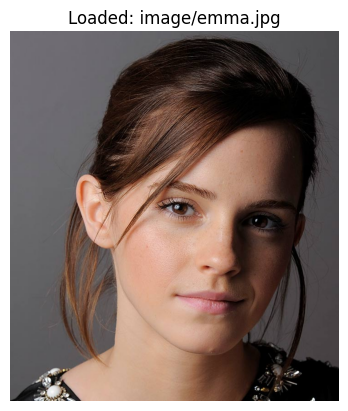

✅ Image loaded successfully!


In [32]:
# First, check your current directory
import os
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir('.'))

# Access images using relative paths - they should be in the same repo!
from PIL import Image
import matplotlib.pyplot as plt

# Example: if your images are in an 'images' folder
image_path = 'image/emma.jpg'  # or whatever your folder structure is

try:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Loaded: {image_path}")
    plt.show()
    print("✅ Image loaded successfully!")
except FileNotFoundError:
    print(f"❌ Image not found at: {image_path}")
    print("Available files:", os.listdir('.'))

In [30]:
# Clone your GitHub repo
!git clone https://github.com/piumixit/CompVisionAssignment

# Navigate to the repo folder
%cd CompVisionAssignment

# Now you can access images with relative paths
from PIL import Image
import matplotlib.pyplot as plt

# Example: if images are in 'images' folder
image_path = 'images/emma.jpg'
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

fatal: destination path 'CompVisionAssignment' already exists and is not an empty directory.
/content/CompVisionAssignment


FileNotFoundError: [Errno 2] No such file or directory: 'images/emma.jpg'

Segment lengths: 51, 101, 106
Total length: 258
Final LUT size: 256


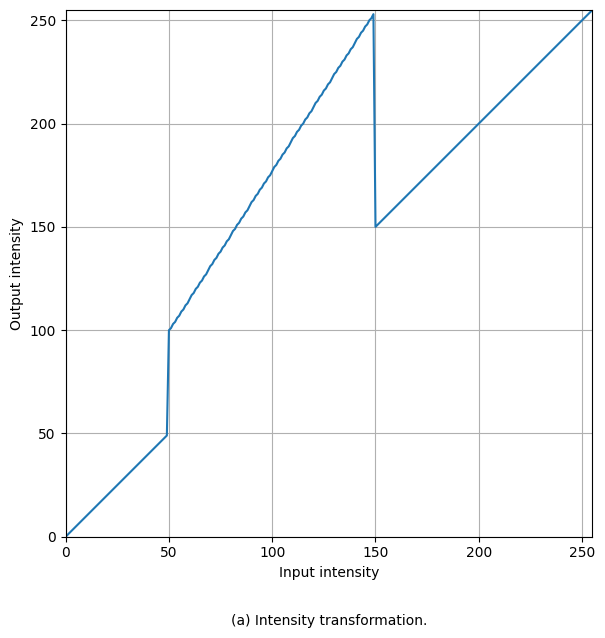

error: OpenCV(4.12.0) /io/opencv/modules/core/src/matrix.cpp:747: error: (-215:Assertion failed) m.dims >= 2 in function 'Mat'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

points = np.array([(0, 0), (50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])


t1 = np.linspace(points[0,1], points[1,1], points[1,0] - points[0,0] + 1, dtype=np.uint8)
t2 = np.linspace(points[2,1], points[3,1], points[3,0] - points[2,0] + 1, dtype=np.uint8)
t3 = np.linspace(points[4,1], points[5,1], points[5,0] - points[4,0] + 1, dtype=np.uint8)

print(f"Segment lengths: {len(t1)}, {len(t2)}, {len(t3)}")
print(f"Total length: {len(t1) + len(t2) + len(t3)}")


transform = np.zeros(256, dtype=np.uint8)
transform[0:51] = t1
transform[50:151] = t2
transform[150:256] = t3

print(f"Final LUT size: {len(transform)}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
ax.grid(True)
plt.figtext(0.5, -0.05, '(a) Intensity transformation.', ha='center')
plt.tight_layout()
plt.show()

img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)

image_transformed = cv.LUT(img_orig, transform)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_transformed, cmap='gray')
ax[0].set_title('Transformed Image')

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_custom_intensity_transformation(image_path):
    """
    Loads an image, applies a predefined piecewise linear intensity transformation,
    and displays the original and transformed images.

    Args:
        image_path (str): The path to the input image file.
    """
    # --- 1. Create the Lookup Table (LUT) from the transformation function ---
    # Initialize a 256-element array for the LUT
    # The data type must be uint8 as pixel values are 0-255
    lut = np.zeros(256, dtype=np.uint8)

    # Define the piecewise linear function based on the graph
    for r in range(256):
        s = 0.0 # Use float for calculations
        if 0 <= r <= 50:
            # Linear segment from (0,0) to (50,50)
            s = r
        elif 50 < r <= 75:
            # Constant segment at 50
            s = 50
        elif 75 < r <= 150:
            # Linear segment from (75, 50) to (150, 255)
            # Formula: s = m*(r - r1) + s1
            s = (205 / 75) * (r - 75) + 50
        elif 150 < r <= 175:
            # Linear segment from (150, 255) to (175, 150)
            s = (-105 / 25) * (r - 150) + 255
        elif 175 < r <= 255:
            # Linear segment from (175, 150) to (255, 255)
            s = (105 / 80) * (r - 175) + 150

        # Round the result and clip to 0-255, then assign to the LUT
        lut[r] = np.clip(round(s), 0, 255)

    # --- 2. Load the image and apply the transformation ---
    # Load the original image
    original_image = cv2.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)

    # Apply the LUT to the grayscale image. This is much faster than a Python loop.
    transformed_image = cv2.LUT(original_image, lut)

    # --- 3. Display the results ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot the Transformation Function
    axes[0].plot(range(256), lut, color='r', linewidth=2)
    axes[0].set_title('Intensity Transformation Function (LUT)', fontsize=14)
    axes[0].set_xlabel('Input Intensity (r)', fontsize=12)
    axes[0].set_ylabel('Output Intensity (s)', fontsize=12)
    axes[0].set_xlim([0, 255])
    axes[0].set_ylim([0, 255])
    axes[0].set_aspect('equal', adjustable='box')


    # Display Original Grayscale Image
    axes[1].imshow(gray_image, cmap='gray')
    axes[1].set_title('Original Grayscale Image', fontsize=14)
    axes[1].axis('off')

    # Display Transformed Image
    axes[2].imshow(transformed_image, cmap='gray')
    axes[2].set_title('Transformed Image', fontsize=14)
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()


# --- Main execution ---
# Replace '1.png' with the path to your image file
image_file_path = '1.png'
apply_custom_intensity_transformation(image_file_path)

error: OpenCV(4.12.0) /io/opencv/modules/core/src/matrix.cpp:747: error: (-215:Assertion failed) m.dims >= 2 in function 'Mat'


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_custom_intensity_transformation(image_path):
    """
    Loads an image, applies a predefined piecewise linear intensity transformation,
    and displays the original and transformed images.

    Args:
        image_path (str): The path to the input image file.
    """
    # --- 1. Create the Lookup Table (LUT) from the transformation function ---
    # Initialize a 256-element array for the LUT
    # The data type must be uint8 as pixel values are 0-255
    lut = np.zeros(256, dtype=np.uint8)

    # Define the piecewise linear function based on the graph
    for r in range(256):
        s = 0.0 # Use float for calculations
        if 0 <= r <= 50:
            # Linear segment from (0,0) to (50,50)
            s = r
        elif 50 < r <= 75:
            # Constant segment at 50
            s = 50
        elif 75 < r <= 150:
            # Linear segment from (75, 50) to (150, 255)
            # Formula: s = m*(r - r1) + s1
            s = (205 / 75) * (r - 75) + 50
        elif 150 < r <= 175:
            # Linear segment from (150, 255) to (175, 150)
            s = (-105 / 25) * (r - 150) + 255
        elif 175 < r <= 255:
            # Linear segment from (175, 150) to (255, 255)
            s = (105 / 80) * (r - 175) + 150

        # Round the result and clip to 0-255, then assign to the LUT
        lut[r] = np.clip(round(s), 0, 255)

    # --- 2. Load the image and apply the transformation ---
    # Load the original image
    original_image = cv2.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)

    # Apply the LUT to the grayscale image. This is much faster than a Python loop.
    transformed_image = cv2.LUT(original_image, lut)

    # --- 3. Display the results ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot the Transformation Function
    axes[0].plot(range(256), lut, color='r', linewidth=2)
    axes[0].set_title('Intensity Transformation Function (LUT)', fontsize=14)
    axes[0].set_xlabel('Input Intensity (r)', fontsize=12)
    axes[0].set_ylabel('Output Intensity (s)', fontsize=12)
    axes[0].set_xlim([0, 255])
    axes[0].set_ylim([0, 255])
    axes[0].set_aspect('equal', adjustable='box')


    # Display Original Grayscale Image
    axes[1].imshow(gray_image, cmap='gray')
    axes[1].set_title('Original Grayscale Image', fontsize=14)
    axes[1].axis('off')

    # Display Transformed Image
    axes[2].imshow(transformed_image, cmap='gray')
    axes[2].set_title('Transformed Image', fontsize=14)
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()


# --- Main execution ---
# Replace '1.png' with the path to your image file
image_file_path = '1.png'
apply_custom_intensity_transformation(image_file_path)

error: OpenCV(4.12.0) /io/opencv/modules/core/src/matrix.cpp:747: error: (-215:Assertion failed) m.dims >= 2 in function 'Mat'


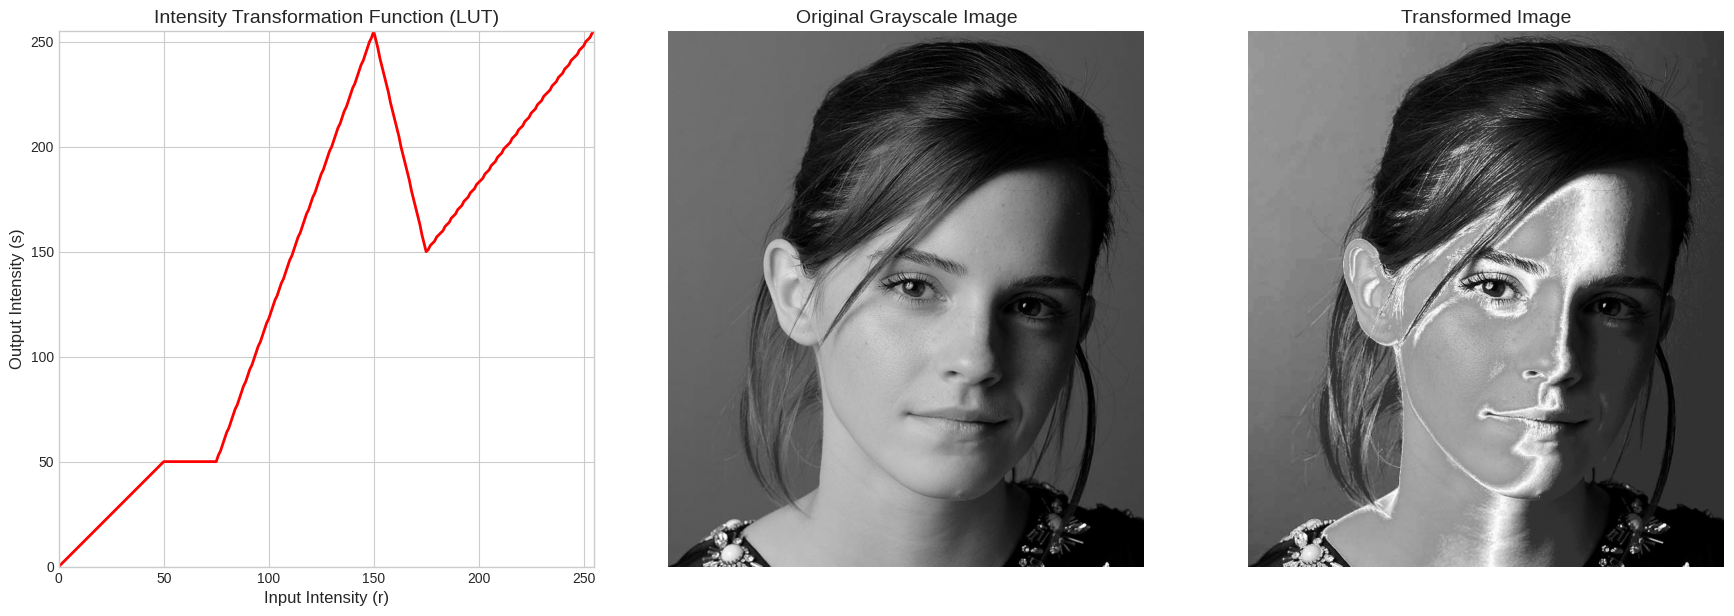

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_custom_intensity_transformation(image_path):
    """
    Loads an image, applies a predefined piecewise linear intensity transformation,
    and displays the original and transformed images.

    Args:
        image_path (str): The path to the input image file.
    """
    # --- 1. Create the Lookup Table (LUT) from the transformation function ---
    # Initialize a 256-element array for the LUT
    # The data type must be uint8 as pixel values are 0-255
    lut = np.zeros(256, dtype=np.uint8)

    # Define the piecewise linear function
    for r in range(256):
        s = 0.0 # Use float for calculations
        if 0 <= r <= 50:
            s = r
        elif 50 < r <= 75:
            s = 50
        elif 75 < r <= 150:
            s = (205 / 75) * (r - 75) + 50
        elif 150 < r <= 175:
            s = (-105 / 25) * (r - 150) + 255
        elif 175 < r <= 255:
            s = (105 / 80) * (r - 175) + 150

        # Round the result and clip to 0-255, then assign to the LUT
        lut[r] = np.clip(round(s), 0, 255)

    # --- 2. Load the image and apply the transformation ---
    # Load the image using the provided image_path parameter and correct constant
    # Note: Use `cv2.imread` instead of `cv.imread`
    # [Correction]: Using image_path and cv2.IMREAD_GRAYSCALE
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Handle the case where the image could not be loaded
    if original_image is None:
        print(f"Error: Could not load image at {image_path}")
        return

    # Apply the LUT to the grayscale image. This is much faster than a Python loop.
    transformed_image = cv2.LUT(original_image, lut)

    # --- 3. Display the results ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot the Transformation Function
    axes[0].plot(range(256), lut, color='r', linewidth=2)
    axes[0].set_title('Intensity Transformation Function (LUT)', fontsize=14)
    axes[0].set_xlabel('Input Intensity (r)', fontsize=12)
    axes[0].set_ylabel('Output Intensity (s)', fontsize=12)
    axes[0].set_xlim([0, 255])
    axes[0].set_ylim([0, 255])
    axes[0].set_aspect('equal', adjustable='box')

    # Display Original Grayscale Image
    # [Correction]: Using `original_image` instead of undefined `gray_image`
    axes[1].imshow(original_image, cmap='gray')
    axes[1].set_title('Original Grayscale Image', fontsize=14)
    axes[1].axis('off')

    # Display Transformed Image
    axes[2].imshow(transformed_image, cmap='gray')
    axes[2].set_title('Transformed Image', fontsize=14)
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# --- Main execution ---
# Make sure the image file exists in the specified path
# If your image is at 'images/emma.jpg', use that path here.
image_file_path = 'image/emma.jpg'
# [Correction]: Call the function with the correct image path
apply_custom_intensity_transformation(image_file_path)